# Metagenomics

## 1. Setting Up/Visualizing the Files

Installed KRAKEN, Krona and downloaded the data files to `qbb2020-answers/week13-assn10`

What are we looking at?

In [1]:
! head week13_data/KRAKEN/SRR492183.kraken

SRR492183.7153	root;cellular organisms;Bacteria;Terrabacteria group;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Enterococcus;Enterococcus faecalis
SRR492183.7155	root;cellular organisms;Bacteria;Terrabacteria group;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Enterococcus;Enterococcus faecalis;Enterococcus faecalis V583
SRR492183.7156	root;cellular organisms;Bacteria;Terrabacteria group;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Enterococcus;Enterococcus faecalis
SRR492183.7157	root;cellular organisms;Bacteria;Terrabacteria group;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Enterococcus;Enterococcus faecalis
SRR492183.7161	root;cellular organisms;Bacteria;Terrabacteria group;Firmicutes;Bacilli;Bacillales;Staphylococcaceae;Staphylococcus;Staphylococcus epidermidis
SRR492183.7163	root;cellular organisms;Bacteria;Terrabacteria group;Firmicutes;Bacilli;Bacillales;Staphylococcaceae;Staphylococcus;Staphylococcus epidermidis
SRR492183.7164	root;cellular organisms;Ba

In [2]:
! head week13_data/READS/SRR492183_1.fastq

@SRR492183.2 HWI-ST330_0096:2:2:2220:2228/1
TTCTGTGTCACAATTTAAAATTGTTCTTCATTACCATTGCAAAGATATGTTTGAAAGCAAGAATTTTACTTC
+
>6<63:1.2703/69FB@F;CDA>CBEEEEEBBD<D=DDA984;:<6@A:CAECE@>22@D?D7;>2<A@9@
@SRR492183.6 HWI-ST330_0096:2:2:4535:2234/1
ACGTTCAATAATCCCTAGAACCCAATCTGTGATAATCGCCATAAAGGCCGTTGGTAAGGCACCGACTAAAATGCTAGAAGCACCATCTG
+
>@9>@ABBB>GGDGGFF>F@DDDDDBC@<@@AA3AB:DCBBEC6>DCA@D@AEE??5DBBA?FF:B.AA*;9B,519+7=;>0BC>>>C
@SRR492183.7 HWI-ST330_0096:2:2:4988:2228/1
TCATCCGATCCACTTCTTCAAATGAACGACAGCCCAAGTAGCGAAAAGCAGAAAGAGCGATGTCGTGATACACGTCATCGCTCGTTTTACTT


Use Krona-tools to visualize/parse the KRAKEN data:

In [3]:
#Krona needs to have each level separated by tabs, luckily this is not so complicated

def KRAKENparser(fname, outfile):
    file_dict = {}
    
    f = open(fname, 'r')
    
    for line in f: # reads line by line 
        line = line.strip('\n')
        x = line.split('\t')[1] # just take second tabbed value
            # we just want to count the identical taxonomies and can deal with parsing it after
        file_dict.setdefault(x, 0) #start the count at 0
        file_dict[x] += 1  #keep the huge mess as the key

    # now time to parse the keys
    fw = open(outfile, 'w') # and re-write the file at the same time!

    for key, item in file_dict.items():
        #wiriting into the new file here instead of adding to dictionary and then re-parsing 
        x = key.split(';')
        fw.write(str(item) + '\t')
        for y in x:
            fw.write(y + '\t')
        fw.write('\n')

    fw.close()
    f.close()


In [4]:
filenumbers = ['83', '86', '88', '89', '90', '93', '94', '97']

for i,j in enumerate(filenumbers):
    KRAKENparser(('week13_data/KRAKEN/SRR4921' + j + '.kraken'), (str(i) + '.kraken'))

now we can use krona-tools to visualize the files:

    ktImportText *kraken

output file: `text.krona.html`

*this file is really cool! screenshot saved to folder*

It looks like Enterococcus faecalis was the most abundant species overall, with significant amounts (~15-20% each) of Baccilales such as staph variants, especially cutibacterium avidum. These species aren't surprising considering the known micrbiota of living humans. One strange finding is that the levels of Baccilates and especially cutibacterium avidum seemed high at birth, reduced or disappeared a day later, only to reappear later. This makes me a bit suspicious of the quantitative sensitivity of these assays/sequences, or of my analysis of the data. 

## 2. Binning

***Question 2:** What metrics in the contigs can we use to group the genomes together?*

We should use kmer counting to find high coverage levels of overlapping contigs. That's what KRAKEN is all about!

And now to use `BWA tools` and `metabat`:

    bwa index -p assembly week13_data/assembly.fasta 
    
    bash bwa-to-sam.sh
        
    metabat2 -i week13_data/assembly.fasta -o week13_data/bins

***Question 3***

**(A)** Metabat2 made 7 bins. I was kind of expecting 3 bins, based on the taxonomic data (for Furmicutes, Actinobacteria, and Baccilales).

**(B)** Prokaryotic genomes are around 8-15 million bp long, and most of these bins found sequences in the hundreds of thousands, with one bin much shorter and another bin much longer. That's reasonable (I think?) to expext, as it covers at most 10% or so of a whole prokaryotic genome. Here are the lenghts of the bin sequences:

    124 691
    498 518
    116 726
    455 101
    269 228
    35 870
    1 447 137

**(C)** The assembly sequence is 38 070 686 nucleotides, so the total coverage of the 7 bins together is around 3 000 000, so around 8% of the total

**(D)** Use BLAST or a similar alignment tool to check for overlaps with known organisms

In [5]:
! head week13_data/bins*

==> week13_data/bins.1.fa <==
>NODE_27_length_124691_cov_12.297314
TTATTATTATTAGTAGTAGTAGTAGTAGTCCTATTTCTATTATTGTTATGATTATTATTC
CGAGTTGTATCATTCACAGCATCCATTGCTTGACGTAATTGTCTTTGTGTATCTGATTCA
TCTTGGAAATAATCATCATCAATCAATTCATCATCATCATCTTCATTAACAGTACCAATA
TTAATATTATTACTATCGTCATCATCATCAATTCTCATAGAATCTTCAATCTCATCTATT
GTAGGATATTGAGTCTCTTGATTATTTTTTGCTGTGGATGTCACATTATCAATACCATCT
ATTTGTACTAATGTGTCACCTTCATCTATACGCTCTTCATTTGCTCGAATAATGGCTTCA
TTGATGAATAGTTTAATATATTCCGATGACAATTCTAATGTACTCAAGGTGATTCTGGTC
TGGGGATCTTTAAAAGATAATTCTTTGAATAGTCTAGCAATGGTTGTCACAGGAATAGAT
TGATTGATTAATTCATTATCATTCTCAGGATCATTATGGATTGGCATTATGTATAGATTG

==> week13_data/bins.2.fa <==
>NODE_3_length_498518_cov_181.760000
CTAACCTATAAAGTTGGCATCTCTTCTTAATTATACATCATTATTCACTTACTTTCAACA
ACTGCAAGAAAATCATCCCATATAAATTCCCTCTTAATTATACATCATTATTCACTTACT
TTTAAAAGACCTATCTTAATAGTCACTTTCTACCTGTTTTTAGCGTCACTTAATAAGCCT
ATAGGCTTATTTTCCTAAAAGCTAATTCTTTTATTCAGTTCTTGTATATTATTCAAGTGC
TAATATTCTATTTCTAAATCTTTTGAAATTTTTCATTCCAAATGTTATTCTCTTTAATAC
TTTTATTTTAT

## 3. Estimate the taxonomy of your putative genomes

In [6]:
ref_dict = {} #this will be built from the assembly file

    
f = open('week13_data/KRAKEN/assembly.kraken', 'r')

#create dictionary of reference sequences and their associated organisms
for line in f:
    line = line.strip('\n')
    x = line.split('\t')
    y = x[1].split(';')
    ref_dict[x[0]] = y

f.close()
#now I have a dictionary with a list of all the taxonomies associated with the sequence nodes

In [7]:
from collections import Counter #after a whole semester of quantbio, I finally actually found something really useful by googling!!!! wooo!!!
        # truth is, a few days ago I had the same feeling when I discoverd glob.glob thinking it solved everything but now I've abandoned it

In [8]:
# and now to make the binfile taxonomy counter function 

def bincounter(binfile):
    b = open(binfile, 'r')
    binlist = []
    count = {}
            
    for line in b:
        x = line.strip('\n') 
        y = x.strip('>')    # it took me waaaaay too long to realize I needed to do this so the lines match the dictionary

        if y in ref_dict.keys(): #checks where it is in the assembly dictionary
            for q in (ref_dict[y]): #goes through every taxonomy in the list that is the dictioary's item
                binlist.append(q) #adds all the taxonomies to the list

    count = Counter(binlist) #makes a dictionary out of how many times each item appears in the list
    return count

    b.close()

In [9]:
# I KNOW there MUST be a better way to do this but I gave up trying after a while
bin1 = bincounter('bins/bin.1.fa')
bin2 = bincounter('bins/bin.2.fa')
bin3 = bincounter('bins/bin.3.fa')
bin4 = bincounter('bins/bin.4.fa')
bin5 = bincounter('bins/bin.5.fa')
bin6 = bincounter('bins/bin.6.fa')
bin7 = bincounter('bins/bin.7.fa')
bin8 = bincounter('bins/bin.8.fa')

In [10]:
#the counter actually stores the data in a really annoying way, so I have to deconvolute it

#so now for more awful, kludge-y solutions...
#yes, yes, I know it's stupid that I have to keep typing out items with sequential numbers, one day I'll actually learn to code for real
bin_dict1 = {}
bin_dict2 = {}
bin_dict3 = {}
bin_dict4 = {}
bin_dict5 = {}
bin_dict6 = {}
bin_dict7 = {}
bin_dict8 = {}

bincounts = [bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8]
bindictionaries = [bin_dict1, bin_dict2, bin_dict3, bin_dict4, bin_dict5, bin_dict6, bin_dict7, bin_dict8]

# now for actual code to deconvolute the Counter dictionaries: 

for i,j in zip(bincounts, bindictionaries):
    for i in i.items():
        j[i[0]] = i[1]
    print(j)
#hooray! now I have dictionaries of counts for each taxonomy term for every bin file

{'root': 72, 'cellular organisms': 72, 'Bacteria': 72, 'Terrabacteria group': 72, 'Firmicutes': 72, 'Bacilli': 70, 'Bacillales': 70, 'Staphylococcaceae': 70, 'Staphylococcus': 70, 'Staphylococcus haemolyticus': 46, 'Staphylococcus haemolyticus JCSC1435': 46, 'Staphylococcus epidermidis': 9, 'Staphylococcus epidermidis RP62A': 3, 'Staphylococcus epidermidis ATCC 12228': 4, 'Staphylococcus aureus': 14, 'Staphylococcus aureus subsp. aureus': 13, 'Staphylococcus aureus subsp. aureus ST72': 1, 'Staphylococcus aureus subsp. aureus CN1': 1, 'Staphylococcus aureus subsp. aureus Mu50': 3, 'Staphylococcus aureus subsp. aureus USA300': 2, 'Staphylococcus aureus CA-347': 1, 'Staphylococcus aureus subsp. aureus 11819-97': 1, 'Staphylococcus aureus subsp. aureus ST398': 2, 'Staphylococcus aureus subsp. aureus 6850': 1, 'Staphylococcus aureus subsp. aureus MSSA476': 1, 'Tissierellia': 2, 'Tissierellales': 2, 'Peptoniphilaceae': 2, 'Anaerococcus': 2, 'Anaerococcus prevotii': 2, 'Anaerococcus prevotii 

#### Question 4:
**(A)** *What are your predictions for each bin?*

    1: Staphylococcus haemolyticus JCSC1435
    2: Leuconostoc citreum KM20
    3: Staphylococcus lugdunensis HKU09-01 (maybe another strain, N920143)
    4: Enterococcus faecalis OG1RF (low confidence on this one)
    5: Cutibacterium avidum 44067
    6: Staphylococcus epidermidis RP62A
    7: Staphylococcus aureus subsp. aureus ST72
    8: Anaerococcus prevotii DSM 20548 (very low confidence on this one too)
    
**(B)** *This approach to classification is fast, but not very quantitative. Propose one method to more robustly infer the taxonomy of a metagenomic bin.*

As I note above, I have very different confidence levels for all these predictions; using BLAST or a similar tool, we could give numbers to the specificity of various genomic sequences and use those numbers to better quantify the identity of the bins. For example, if there is a sepecific strain of bacteria with a 50 nucleotide sequence that is very unusual, finding such a sequence should give more probabilistic weight to assigning the bin to that bacteria species than 50nt sequence which is assigned based on the identity of a few SNPs withing the sequence


# 4. Heatmap

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [12]:
df = pd.DataFrame()

for i in bindictionaries:
    df = df.append(i, ignore_index=True)

(df)

,Anaerococcus,Anaerococcus prevotii,Anaerococcus prevotii DSM 20548,Bacillales,Bacilli,Bacteria,Firmicutes,Peptoniphilaceae,Staphylococcaceae,Staphylococcus,...,Clostridiales,Clostridium,Clostridium novyi,Clostridium novyi NT,Finegoldia,Finegoldia magna,Finegoldia magna ATCC 29328,Streptococcus anginosus,Streptococcus anginosus C238,Streptococcus anginosus group
0,2.0,2.0,2.0,70.0,70.0,72.0,72.0,2.0,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,194.0,194.0,194.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,74.0,74.0,74.0,74.0,NaN,74.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,6.0,6.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,73.0,73.0,73.0,73.0,NaN,73.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,60.0,60.0,60.0,60.0,NaN,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.0,3.0,3.0,NaN,1.0,8.0,8.0,5.0,NaN,NaN,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0


In [13]:
df = pd.read_csv("abundance_table.tab", delimiter = "\t")
df

,Genomic bins,SRR492186,SRR492066,SRR492182,SRR492188,SRR492196,SRR492183,SRR492184,SRR492185,SRR492065,SRR492187,SRR492197,SRR492189,SRR492195,SRR492194,SRR492193,SRR492192,SRR492191,SRR492190
0,bin.1,167.273691,67.688884,54.858154,102.432386,335.756912,50.103235,96.383771,175.127948,71.420624,190.391037,72.544371,97.521190,49.834345,53.357374,172.449773,179.006341,14.685431,14.523105
1,bin.4,9348.741359,7247.577187,4178.397657,8139.870719,11597.033828,4115.242526,11633.667679,9219.720953,7240.045338,9979.380909,8745.103316,8308.156703,6646.119922,6550.505763,6267.155205,6151.257743,5780.879180,5267.858711
2,bin.2,8.887730,5.406628,1.986297,5.838109,8.348499,1.751119,31.799458,9.170054,6.087799,37.581807,19.275630,5.929623,3.451473,3.259988,1.804228,1.629252,4.652603,4.583909
3,bin.5,0.552469,2034.534641,1232.387641,0.875860,0.436084,1566.783656,670.257316,0.747395,1869.640953,108.026882,4250.653466,0.356678,593.767516,457.543378,315.740755,282.011644,0.772755,1.251430
4,bin.6,820.872805,392.881731,1427.905710,1033.761424,1884.339618,1335.147536,1027.807284,850.342196,427.134461,2391.501197,936.681889,999.273162,1143.743857,1187.660153,1670.022745,1719.723610,1136.902519,1071.641137
5,bin.7,1.452063,681.886830,2.467008,1.347894,3.084744,1.287979,2124.191118,2.312693,714.809488,7.140755,590.194971,0.747525,1093.414384,1124.427189,6.459688,7.175036,1.496781,3.287205
6,bin.8,0.065351,3219.448810,0.223916,4.223711,0.698382,0.186461,889.316796,0.181546,3498.783627,1.199693,3366.910935,0.979570,71.465536,73.851083,1.211367,4.114233,0.088835,0.259990
7,bin.3,6.194380,23.178964,2.759951,0.475050,1.563200,2.555610,1.259343,6.237916,24.206000,137.042032,10.595311,0.333899,6.668268,6.639770,78.291586,79.491024,0.523699,0.491073


In [14]:
#renaming the bin numbers based on my predictions above
#ignoring the name of the strain
#gotta be careful since they're not in numberical order

df["Genomic bins"][0] = "Staphylococcus haemolyticus"
df["Genomic bins"][1] = "Enterococcus faecalis"
df["Genomic bins"][2] = "Leuconostoc citreum"
df["Genomic bins"][3] = "Cutibacterium avidum"
df["Genomic bins"][4] = "Staphylococcus epidermidis"
df["Genomic bins"][5] = "Staphylococcus aureus"
df["Genomic bins"][6] = "Anaerococcus prevotii"
df["Genomic bins"][7] = "Staphylococcus lugdunensis"
df = df.set_index("Genomic bins")
df

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/cmdb/miniconda3/envs

,SRR492186,SRR492066,SRR492182,SRR492188,SRR492196,SRR492183,SRR492184,SRR492185,SRR492065,SRR492187,SRR492197,SRR492189,SRR492195,SRR492194,SRR492193,SRR492192,SRR492191,SRR492190
Genomic bins,,,,,,,,,,,,,,,,,,
Staphylococcus haemolyticus,167.273691,67.688884,54.858154,102.432386,335.756912,50.103235,96.383771,175.127948,71.420624,190.391037,72.544371,97.521190,49.834345,53.357374,172.449773,179.006341,14.685431,14.523105
Enterococcus faecalis,9348.741359,7247.577187,4178.397657,8139.870719,11597.033828,4115.242526,11633.667679,9219.720953,7240.045338,9979.380909,8745.103316,8308.156703,6646.119922,6550.505763,6267.155205,6151.257743,5780.879180,5267.858711
Leuconostoc citreum,8.887730,5.406628,1.986297,5.838109,8.348499,1.751119,31.799458,9.170054,6.087799,37.581807,19.275630,5.929623,3.451473,3.259988,1.804228,1.629252,4.652603,4.583909
Cutibacterium avidum,0.552469,2034.534641,1232.387641,0.875860,0.436084,1566.783656,670.257316,0.747395,1869.640953,108.026882,4250.653466,0.356678,593.767516,457.543378,315.740755,282.011644,0.772755,1.251430
Staphylococcus epidermidis,820.872805,392.881731,1427.905710,1033.761424,1884.339618,1335.147536,1027.807284,850.342196,427.134461,2391.501197,936.681889,999.273162,1143.743857,1187.660153,1670.022745,1719.723610,1136.902519,1071.641137
Staphylococcus aureus,1.452063,681.886830,2.467008,1.347894,3.084744,1.287979,2124.191118,2.312693,714.809488,7.140755,590.194971,0.747525,1093.414384,1124.427189,6.459688,7.175036,1.496781,3.287205
Anaerococcus prevotii,0.065351,3219.448810,0.223916,4.223711,0.698382,0.186461,889.316796,0.181546,3498.783627,1.199693,3366.910935,0.979570,71.465536,73.851083,1.211367,4.114233,0.088835,0.259990
Staphylococcus lugdunensis,6.194380,23.178964,2.759951,0.475050,1.563200,2.555610,1.259343,6.237916,24.206000,137.042032,10.595311,0.333899,6.668268,6.639770,78.291586,79.491024,0.523699,0.491073


In [15]:
#selecting the days was actually really not easy! it was very annoying to keep going back and forth between the filenames
#and the dataframe columns aren't even in the right order! ugh!

daymap = df[['SRR492183','SRR492186','SRR492188','SRR492189','SRR492190','SRR492193','SRR492194','SRR492197']]

daymap.rename(columns = {'SRR492183':'day0', 'SRR492186':'day1', 'SRR492188':'day2','SRR492189':'day3','SRR492190':'day4','SRR492193':'day5','SRR492194':'day6','SRR492197':'day7'}, inplace=True)

daymap

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,day0,day1,day2,day3,day4,day5,day6,day7
Genomic bins,,,,,,,,
Staphylococcus haemolyticus,50.103235,167.273691,102.432386,97.521190,14.523105,172.449773,53.357374,72.544371
Enterococcus faecalis,4115.242526,9348.741359,8139.870719,8308.156703,5267.858711,6267.155205,6550.505763,8745.103316
Leuconostoc citreum,1.751119,8.887730,5.838109,5.929623,4.583909,1.804228,3.259988,19.275630
Cutibacterium avidum,1566.783656,0.552469,0.875860,0.356678,1.251430,315.740755,457.543378,4250.653466
Staphylococcus epidermidis,1335.147536,820.872805,1033.761424,999.273162,1071.641137,1670.022745,1187.660153,936.681889
Staphylococcus aureus,1.287979,1.452063,1.347894,0.747525,3.287205,6.459688,1124.427189,590.194971
Anaerococcus prevotii,0.186461,0.065351,4.223711,0.979570,0.259990,1.211367,73.851083,3366.910935
Staphylococcus lugdunensis,2.555610,6.194380,0.475050,0.333899,0.491073,78.291586,6.639770,10.595311


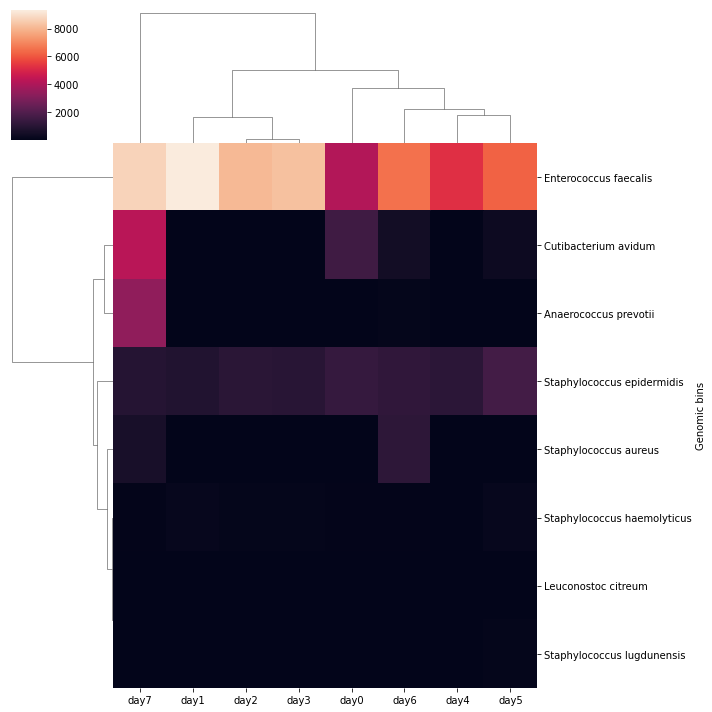

In [16]:
#and for the final one-liner:
seaborn.clustermap(daymap)

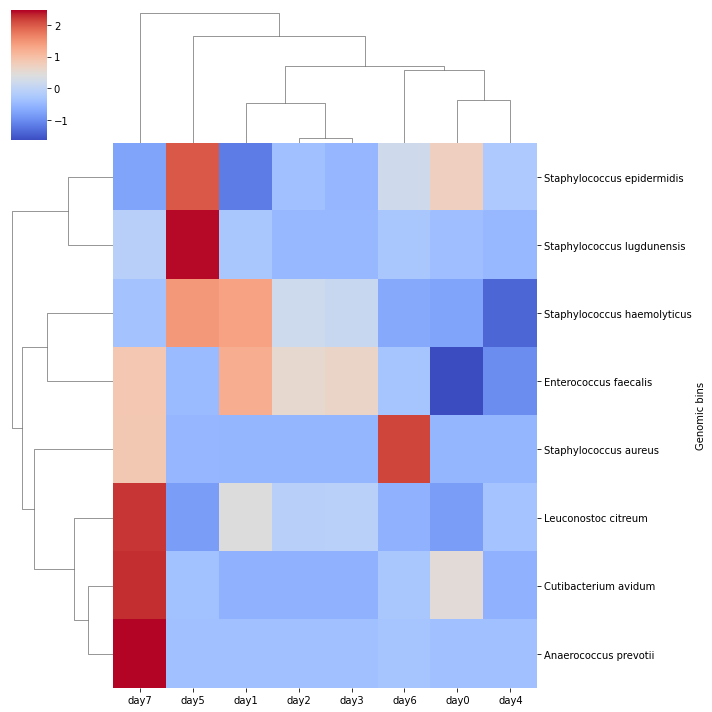

In [17]:
# that looks hideous! I'm going to normalize the data just to make it look nicer

#for some reason seaborn is putting the days out of order, and I gave up trying to fix

seaborn.clustermap(daymap, z_score=0, cmap="coolwarm")


#### Question 5
Even though the heatmap is annoying to read with the days out of order, the trend is the same overall: the most abunadnt species by far is Enterococcus faecalis, and just like with the Krona visualization, it's easy to see that the Cutibacterium avidum abundance is very high on day0, disappears, and grows significantly on days 5, 6, and 7. There are some slight differences, such as regarding Anaerococcus prevotii which barely made a blip on the krona file but is shown in high abundance on day 7 - but actually, I wouldn't conclude anything based on this since as mentioned before I have low confidence that this species was identified correctly
